In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = 'brainmentors'
os.environ['KAGGLE_KEY'] = '854258f0a96411cb66c4ca9ddc3fe5dc'

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
len(os.listdir('chest_xray/train/NORMAL/'))

1341

In [ ]:
len(os.listdir('chest_xray/train/PNEUMONIA/'))

3875

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_path = "chest_xray/train/"
test_path = "chest_xray/test/"

In [ ]:
def load_data(path):
  features = []
  labels = []
  dirs = os.listdir(path)
  for i, dir in enumerate(dirs):
    images = os.listdir(path + "/" + dir)
    for img in images:
      try:
        img_path = path + "/" + dir + "/" + img
        image = cv2.imread(img_path)
        image = cv2.resize(image, (224,224))
        features.append(image)
        labels.append(i)
      except BaseException as ex:
        print("Unable to load",img_path)

  return features, labels

In [ ]:
train_images, train_labels = load_data(train_path)

In [ ]:
len(train_images)

5216

In [ ]:
# train_images[0]

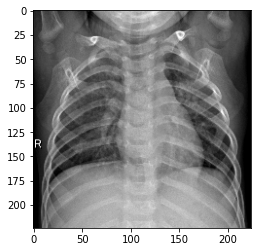

In [ ]:
plt.imshow(train_images[0])

In [ ]:
np.unique(train_labels, return_counts=True)

(array([0, 1]), array([1341, 3875]))

In [ ]:
test_images, test_labels = load_data(test_path)

In [ ]:
train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

In [ ]:
train_labels.shape

(5216,)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3, VGG19, ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [ ]:
pre_model = VGG19()

574726144/574710816 [==============================] - 6s 0us/step


In [ ]:
pre_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
output_layer = pre_model.output

In [ ]:
output_layer

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

In [ ]:
x = pre_model.output
x = Dense(1024, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

In [ ]:
model = Model(inputs=pre_model.input, outputs=output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))